# Red Bull Logo
## On-Premise Sales Analysis

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\Account Sales Data for Analysis v2.csv")

In [66]:
df.head(3)

,Account Name,Account Address,Decision Maker,Phone Number,Account Type,Regular,Sugar Free,Yellow Edition,Cooler?,Digital screen?,Menu inclusion?,Posters?,2017,2018,2019,2020,2021,CAGR
0,Bar 1,"2131 Patterson Road, Brooklyn NY 11201",Dorothy Rizzo,(880) 283-6803,Bar,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1982,5388,7063,7208,9093,36%
1,Bar 2,"3685 Morningview Lane, New York NY 10013",Lawson Moore,(711) 426-7350,Bar,Yes,Yes,Yes,No,Yes,Yes,Yes,2786,3804,4121,6210,6909,20%
2,Bar 3,"2285 Ladybug Drive, New York NY 10013",Vin Hudson,(952) 952-5573,Bar,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1209,1534,1634,4302,9768,52%


In [67]:
df.isnull().sum()

Account Name       0
Account Address    0
Decision Maker     0
Phone Number       0
Account Type       0
Regular            0
Sugar Free         0
Yellow Edition     0
Cooler?            0
Digital screen?    0
Menu inclusion?    0
Posters?           0
2017               0
2018               0
2019               0
2020               0
2021               0
CAGR               0
dtype: int64

In [68]:
df.duplicated().sum()

0

In [69]:
df.shape

(60, 18)

In [70]:
df['Account Type'].value_counts()

Bar           15
Restaurant    15
Club          15
Hotel         15
Name: Account Type, dtype: int64

In [71]:
df.columns

Index(['Account Name', 'Account Address', 'Decision Maker', 'Phone Number',
       'Account Type', 'Regular', 'Sugar Free', 'Yellow Edition', 'Cooler?',
       'Digital screen?', 'Menu inclusion?', 'Posters?', '2017', '2018',
       '2019', '2020', '2021', 'CAGR'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Account Name     60 non-null     object
 1   Account Address  60 non-null     object
 2   Decision Maker   60 non-null     object
 3   Phone Number     60 non-null     object
 4   Account Type     60 non-null     object
 5   Regular          60 non-null     object
 6   Sugar Free       60 non-null     object
 7   Yellow Edition   60 non-null     object
 8   Cooler?          60 non-null     object
 9   Digital screen?  60 non-null     object
 10  Menu inclusion?  60 non-null     object
 11  Posters?         60 non-null     object
 12  2017             60 non-null     int64 
 13  2018             60 non-null     int64 
 14  2019             60 non-null     int64 
 15  2020             60 non-null     int64 
 16  2021             60 non-null     int64 
 17  CAGR             60 non-null     obje

In [73]:
df.columns=df.columns.str.replace(' ','')

### Finding keys and insights

#### Total sales by Account Type and Year

In [74]:
PIVOT_TABLE = df.pivot_table(index='AccountType',
                            values=['2017','2018','2019','2020','2021'],aggfunc=sum)

In [78]:
PIVOT_TABLE

,2017,2018,2019,2020,2021
AccountType,,,,,
Bar,51804,60121,60760,75991,94147
Club,47259,67275,79646,102065,112270
Hotel,44888,50567,70312,82583,100592
Restaurant,46025,65032,77731,89595,102185


<AxesSubplot: xlabel='AccountType'>

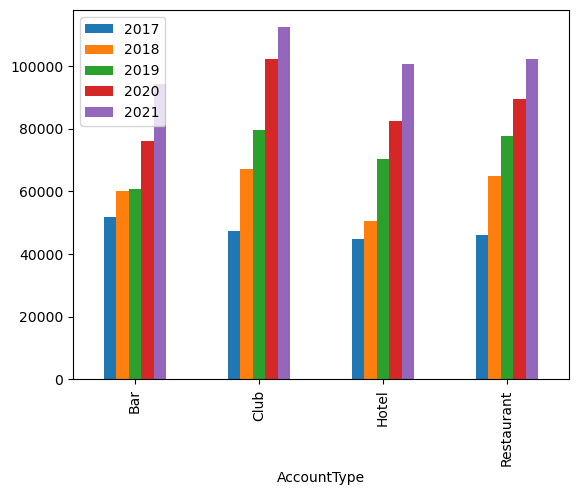

In [79]:
PIVOT_TABLE.plot(kind='bar')

Insights based on the data:

- Overall, the revenue of each account type has increased from 2017 to 2021.
- The revenue of the "Club" account type has increased the most among all the account types. In 2021, the revenue was 112270 which is a 138% increase from the revenue in 2017.
- The "Hotel" account type has also seen significant growth with a 124% increase in revenue from 2017 to 2021.
- The "Restaurant" account type has also seen moderate growth with a 121% increase in revenue from 2017 to 2021.
- The "Bar" account type has seen the least growth among all the account types with an 80% increase in revenue from 2017 to 2021.

> Sales growth/trends by Year

In [80]:
sale17=PIVOT_TABLE['2017'].sum()
sale18=PIVOT_TABLE['2018'].sum()
sale19=PIVOT_TABLE['2019'].sum()
sale20=PIVOT_TABLE['2020'].sum()
sale21=PIVOT_TABLE['2021'].sum()

In [81]:
saleTotal=[sale17,sale18,sale19,sale20,sale21]

In [82]:
total_sales_df = pd.DataFrame({'Year': ['2017', '2018', '2019', '2020', '2021'],
'Total Sales': saleTotal})

In [83]:
total_sales_df

,Year,Total Sales
0,2017,189976
1,2018,242995
2,2019,288449
3,2020,350234
4,2021,409194


In [84]:
total_sales_df['Sales Growth'] = (total_sales_df['Total Sales'] - total_sales_df['Total Sales'].shift(1)) / total_sales_df['Total Sales'].shift(1)

<AxesSubplot: xlabel='Year', ylabel='Sales Growth'>

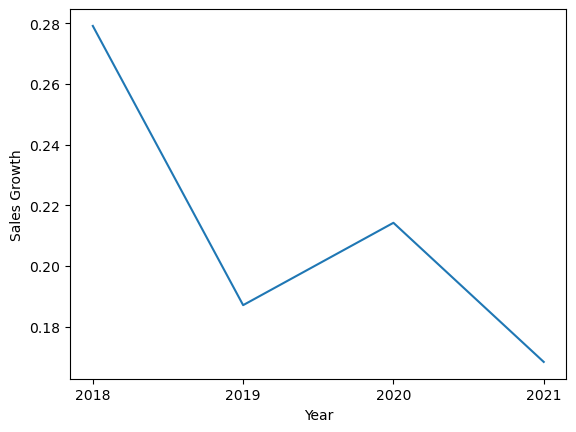

In [85]:
sns.lineplot(data=total_sales_df,x='Year',y='Sales Growth')

<AxesSubplot: xlabel='Year', ylabel='Total Sales'>

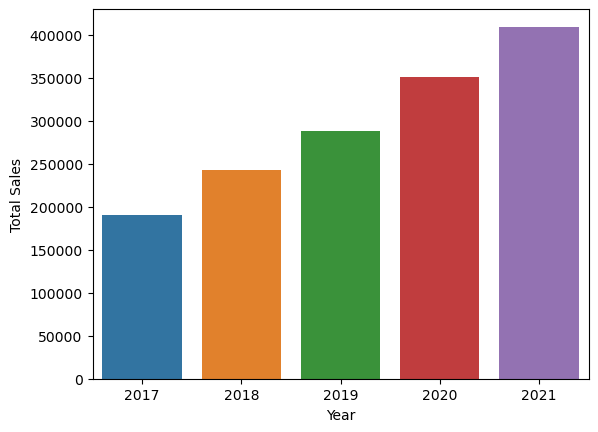

In [86]:
sns.barplot(data=total_sales_df,x='Year',y='Total Sales')

Based on the data, here are some insights into the sales growth:

- The total sales have increased consistently from 2017 to 2021, indicating a positive trend.
- The growth in sales from 2017 to 2018 was 28%, from 2018 to 2019 was 19%, from 2019 to 2020 was 22%, and from 2020 to 2021 was 17%.
- Total Sales: From 2017 to 2021, the total sales have increased consistently. In 2021, the total sales reached 409194, which is the highest among all the years.

- Sales Growth: The sales growth rate was highest in 2018 with a growth rate of 27.91%. The sales growth rate decreased in the following years but still remained positive, indicating a steady increase in sales. The sales growth rate in 2021 was 16.83%.

In [87]:
new_df=PIVOT_TABLE.transpose()
new_df

AccountType,Bar,Club,Hotel,Restaurant
2017,51804,47259,44888,46025
2018,60121,67275,50567,65032
2019,60760,79646,70312,77731
2020,75991,102065,82583,89595
2021,94147,112270,100592,102185


In [88]:
PIVOT_TABLE['Total'] = PIVOT_TABLE.sum(axis=1)

## Best and worst performing accounts (overall, and by account type)

In [89]:
PIVOT_TABLE

,2017,2018,2019,2020,2021,Total
AccountType,,,,,,
Bar,51804,60121,60760,75991,94147,342823
Club,47259,67275,79646,102065,112270,408515
Hotel,44888,50567,70312,82583,100592,348942
Restaurant,46025,65032,77731,89595,102185,380568


## Recent sales analysis:
- Worst performing account type is Bar with sales 94147.
- Best performing account type is CLub with sales 112270.
### best Performing Account by Type:
- For the Bar account type, the best performing year was 2021 with total sales of 94147.
- For the Club account type, the best performing year was 2020 with total sales of 102065.
- For the Hotel account type, the best performing year was 2021 with total sales of 100592.
- For the Restaurant account type, the best performing year was 2021 with total sales of 102185.

### Worst Performing Account by Type:
- For the Bar account type, the worst performing year was 2017 with total sales of 51804.
- For the Club account type, the worst performing year was 2017 with total sales of 47259.
- For the Hotel account type, the worst performing year was 2018 with total sales of 50567.
- For the Restaurant account type, the worst performing year was 2017 with total sales of 46025.


## Effect of assortment (product lines) presence on sales

Formulating the null and alternative hypotheses:
- H0: The type of establishment and subscription to the Yellow Edition are independent (not related)
- Ha: The type of establishment and subscription to the Yellow Edition are dependent (related)

In [90]:
from scipy.stats import chi2_contingency

In [91]:
yellowEdition=pd.crosstab(df['YellowEdition'],df['AccountType'])
Regular=pd.crosstab(df['Regular'],df['AccountType'])
Sugarfree=pd.crosstab(df['SugarFree'],df['AccountType'])

In [92]:
yellowEdition

AccountType,Bar,Club,Hotel,Restaurant
YellowEdition,,,,
No,7,3,5,15
Yes,8,12,10,0


<AxesSubplot: xlabel='YellowEdition'>

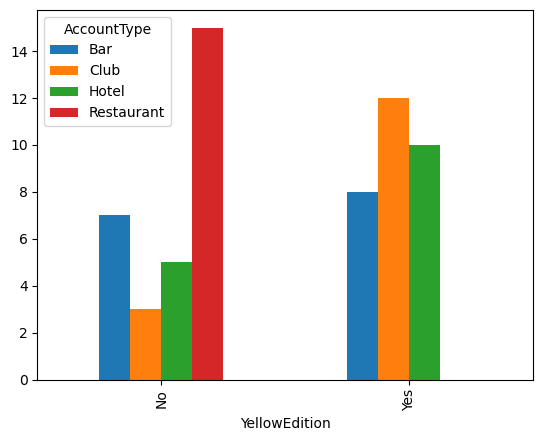

In [93]:
yellowEdition.plot(kind='bar')

In [94]:
chi2, p, expected ,stats = chi2_contingency(yellowEdition)

In [95]:
print("p-value: ", p)

p-value:  6.119397697400122e-05


In [96]:
Sugarfree

AccountType,Bar,Club,Hotel,Restaurant
SugarFree,,,,
No,4,2,4,2
Yes,11,13,11,13


In [97]:
chi2, p, expected ,stats = chi2_contingency(Sugarfree)

In [98]:
print("p-value: ", p)

p-value:  0.6443698056370253


<AxesSubplot: xlabel='SugarFree'>

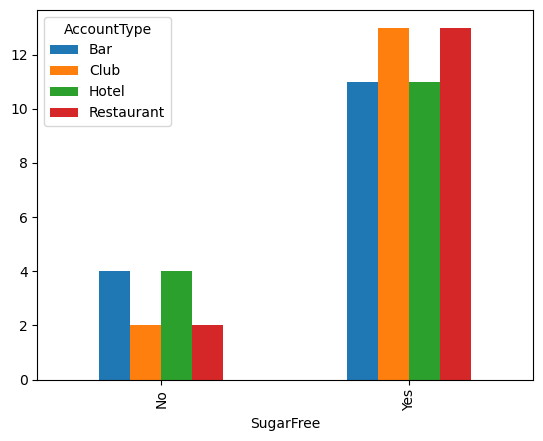

In [99]:
Sugarfree.plot(kind='bar')

<AxesSubplot: xlabel='YellowEdition'>

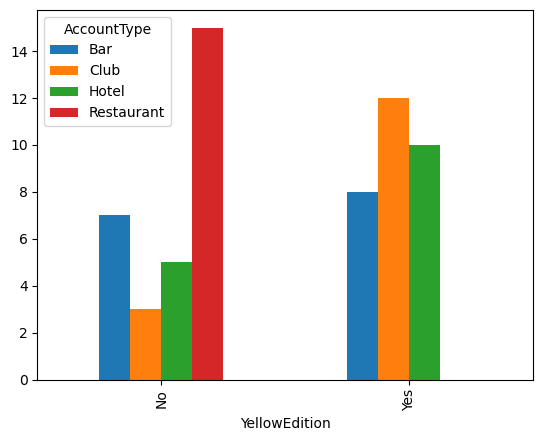

In [113]:
yellowEdition.plot(kind='bar')

- Based on the data provided, it appears that the presence of Yellow Edition influences sales differently across different types of establishments. In bars, the presence of Yellow Edition results in a 1 unit increase in sales. In clubs, however, the presence of Yellow Edition leads to a 9 unit increase in sales. The presence of Yellow Edition also has a positive effect on sales in hotels, with sales increasing by 5 units. In restaurants, however, sales appear to decrease by 15 units with the presence of Yellow Edition.


- These findings suggest that the impact of product line assortment on sales can vary greatly depending on the type of establishment and that it may be worth exploring why Yellow Edition has a negative impact on sales in restaurants. Further analysis, such as gathering more data or conducting customer surveys, could provide more insight into the reasons for this trend and help inform future decisions about product line assortment.

## Effectiveness of the different marketing/promotion programs


In [134]:
cooler=pd.crosstab(df['Cooler?'],df['AccountType'])

In [136]:
cooler

AccountType,Bar,Club,Hotel,Restaurant
Cooler?,,,,
No,7,7,13,7
Yes,8,8,2,8


<AxesSubplot: xlabel='Cooler?'>

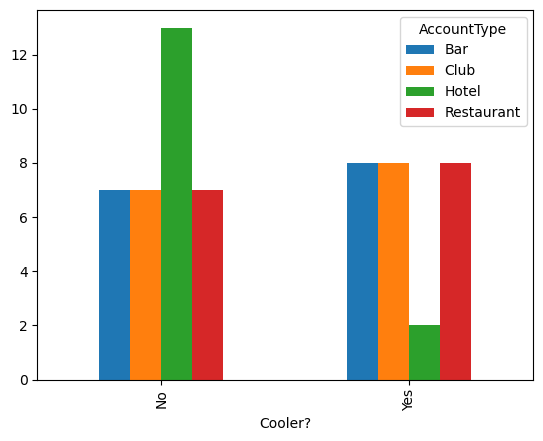

In [135]:
cooler.plot(kind='bar')

- Bars, Clubs and Restaurants have a similar number of establishments with coolers and without coolers.

- Hotels are much less likely to have coolers compared to the other types of establishments.

- The majority of establishments in each category do not have coolers.

- The proportion of establishments with coolers is higher for Bars, Clubs, and Restaurants than for Hotels.

In [138]:
digital=pd.crosstab(df['Digitalscreen?'],df['AccountType'])

In [139]:
digital

AccountType,Bar,Club,Hotel,Restaurant
Digitalscreen?,,,,
No,7,8,15,10
Yes,8,7,0,5


<AxesSubplot: xlabel='Digitalscreen?'>

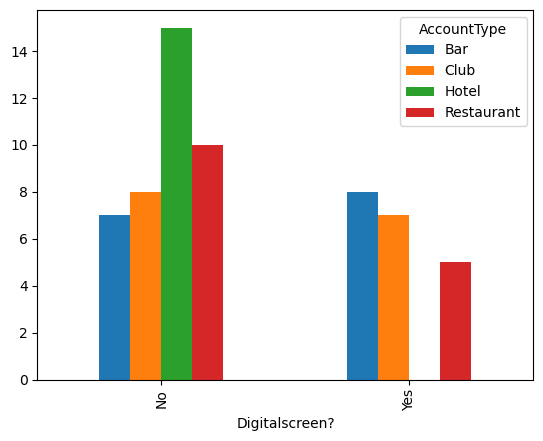

In [140]:
digital.plot(kind='bar')

Some insights from the table are:

- Bars and Clubs have a similar number of establishments with and without digital screens.

- Hotels do not have any digital screens in this data set.

- Restaurants have a higher proportion of establishments without digital screens compared to Bars and Clubs.

- The overall trend shows that a larger number of establishments do not have digital screens.

- These insights can provide valuable information for companies looking to sell digital screens to establishments, as they can target those types of establishments that  are more likely to have digital screens.








In [142]:
menu=pd.crosstab(df['Menuinclusion?'],df['AccountType'])

In [143]:
menu

AccountType,Bar,Club,Hotel,Restaurant
Menuinclusion?,,,,
No,3,3,5,7
Yes,12,12,10,8


Some insights from the table are:

- Bars, Clubs and Restaurants have a higher proportion of establishments that include a menu on their digital screens compared to Hotels.

- The majority of establishments in each category include a menu on their digital screens.

- The proportion of establishments that include a menu on their digital screens is higher for Bars, Clubs and Restaurants than for Hotels.

# Recommendation

### Based on the insights from the three tables, the following recommendations can be made:

- ### Companies looking to sell coolers should target Bars, Clubs, and Restaurants, as they have a higher proportion of establishments that have coolers compared to Hotels.

- ### Companies looking to sell digital screens should focus on Bars and Clubs, as they have a similar number of establishments with and without digital screens. Hotels do not have any digital screens in this data set.

- ### Companies looking to sell digital menu systems should target Bars, Clubs and Restaurants, as they have a higher proportion of establishments that include a menu on their digital screens compared to Hotels.

- ### These recommendations can help companies better target their sales efforts and increase their chances of success.

In [152]:
from sklearn.preprocessing import LabelEncoder

In [157]:
for col in df.columns:
    le = LabelEncoder()
    le.fit(df[col])
    df[col]=le.transform(df[col])

In [161]:
df.columns

Index(['AccountName', 'AccountAddress', 'DecisionMaker', 'PhoneNumber',
       'AccountType', 'Regular', 'SugarFree', 'YellowEdition', 'Cooler?',
       'Digitalscreen?', 'Menuinclusion?', 'Posters?', '2017', '2018', '2019',
       '2020', '2021', 'CAGR'],
      dtype='object')